In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
wine_descriptions = {
    'body': ['thin', 'cliff-edge', 'hollow', 'mellow', 'short', 'austere', 'angular', 'delicate', 'elegant', 'light-bodied', 'finesse',
    'closed', 'polished', 'complex', 'full-bodied', 'tight', 'firm', 'powerful', 'concentrated', 'dense', 'opulent', 'rich', 'extracted',        'flabby', 'fat'],
    'yeast': ['sour', 'cheesy', 'biscuit', 'creamy', 'buttery'],
    'style': ['barnyard', 'smoky', 'earthy', 'leathery', 'musky', 'fleshy', 'accessible', 'clean', 'delicate', 'elegant', 'polished', 'refined'],
    'tannin': ['bitter', 'harsh', 'aggressive', 'grippy', 'angular', 'powerful', 'coarse', 'leathery', 'rigid', 'muscular', 'firm', 'structured', 'chewy', 'chocolate', 'silky', 'smooth', 'round', 'opulent', 'velvety', 'voluptuous', 'supple', 'soft', 'mellow', 'spineless', 'flabby'],
    'acidity': ['bright', 'astringent', 'austere', 'thin', 'lean', 'angular', 'racy', 'tart', 'edgy', 'nerve', 'zippy', 'zesty', 'lively', 'fresh', 'crisp', 'delicate', 'soft', 'flabby', 'fallen over', 'flat'],
    'alcohol': ['jammy', 'hot', 'burn', 'legs', 'spicy'],
    'spice': ['spicy', 'musky', 'bright', 'pepper', 'anise', 'clove', 'cinnamon', 'nutmeg', 'saffron', 'ginger'],
    'fruit': ['jammy', 'ripe', 'juicy', 'flamboyant', 'fleshy', 'extracted', 'plummy', 'red fruit', 'black fruit', 'grapey', 'berry', 'cassis', 'citrus', 'stone fruit', 'tropical fruit', 'melon', 'apple', 'strawberry', 'raspberry', 'cherry', 'blueberry', 'blackberry', 'lime', 'lemon', 'orange', 'grapefruit', 'apricot', 'nectarine', 'peach', 'banana', 'pineapple', 'lychee', 'coconut'],
    'flower': ['white flowers', 'violet', 'perfumed', 'lavender', 'rose', 'citrus blossom', 'geranium'],
    'herb': ['stemmy', 'stalky', 'vegetal', 'asparagus', 'green', 'grassy', 'sage', 'eucalyptus', 'jalapeno', 'dill', 'bell pepper', 'gooseberry', 'quince'],
    'oak': ['smoky', 'charcoal', 'sweet tobacco', 'toasty', 'spicy', 'clove', 'nutty', 'coconut', 'caramel', 'vanilla', 'buttery', 'dill', 'creamy'],
    'inorganic': ['minerality', 'graphite', 'petichor', 'unctuous', 'oily', 'petroleum', 'plastic', 'tar', 'rubber', 'diesel', 'smoky']
}

wine_adj = np.unique(np.concatenate(list(wine_descriptions.values())))

In [4]:
guided_dataset = dataset.copy(deep=True)

matching = []
adj_presence = dict.fromkeys(wine_adj, 0)

for i, review in guided_dataset.iterrows():
    description_onegrams = review['description'].split()
    adj_match = list(set(description_onegrams) & set(wine_adj))
    matching.append(adj_match)
    for match in adj_match:
        adj_presence[match] += 1

In [5]:
guided_dataset = guided_dataset.assign(adjectives=pd.Series(matching))

In [6]:
guided_dataset = guided_dataset.assign(adjectives_count=guided_dataset['adjectives'].str.len())
guided_dataset

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,adjectives,adjectives_count
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,"[citrus, sage]",2
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"[berry, smooth, ripe, juicy]",4
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"[green, crisp, pineapple, lime]",4
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"[lemon, orange]",2
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),"[grapefruit, tart]",2
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,[coconut],1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,"[ripe, crisp]",2
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,"[crisp, apple, powerful]",3


In [7]:
guided_dataset = guided_dataset[guided_dataset['adjectives_count'] > 0]
guided_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120346 entries, 0 to 129970
Data columns (total 16 columns):
Unnamed: 0               120346 non-null int64
country                  120286 non-null object
description              120346 non-null object
designation              85904 non-null object
points                   120346 non-null int64
price                    111998 non-null float64
province                 120286 non-null object
region_1                 100265 non-null object
region_2                 45511 non-null object
taster_name              96681 non-null object
taster_twitter_handle    91871 non-null object
title                    120346 non-null object
variety                  120345 non-null object
winery                   120346 non-null object
adjectives               120346 non-null object
adjectives_count         120346 non-null int64
dtypes: float64(1), int64(3), object(12)
memory usage: 15.6+ MB


In [8]:
guided_dataset['str_adjectives'] = [', '.join(map(str, l)) for l in guided_dataset['adjectives']]
guided_dataset

/home/enrico/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,adjectives,adjectives_count,str_adjectives
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,"[citrus, sage]",2,"citrus, sage"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"[berry, smooth, ripe, juicy]",4,"berry, smooth, ripe, juicy"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"[green, crisp, pineapple, lime]",4,"green, crisp, pineapple, lime"
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"[lemon, orange]",2,"lemon, orange"
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,"[raspberry, green, fresh]",3,"raspberry, green, fresh"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),"[grapefruit, tart]",2,"grapefruit, tart"
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,[coconut],1,coconut
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,"[ripe, crisp]",2,"ripe, crisp"
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,"[crisp, apple, powerful]",3,"crisp, apple, powerful"


In [9]:
adj_df = pd.DataFrame([adj_presence.keys(), adj_presence.values()], index=['adjective', 'presence']).transpose()
adj_df[adj_df['presence'] == 0]

,adjective,presence
11,bell pepper,0
15,black fruit,0
30,citrus blossom,0
32,cliff-edge,0
50,fallen over,0
99,petichor,0
109,red fruit,0
129,stone fruit,0
133,sweet tobacco,0
139,tropical fruit,0


In [10]:
adj_df.plot(x='adjective', y='presence', kind='bar', figsize=(18,10))

In [11]:
guided_dataset.to_csv('winemag-adj-130k.csv')

In [65]:
dataset = pd.get_dummies(pd.DataFrame(guided_dataset.adjectives.values.tolist()), prefix='adj')
dataset = dataset.groupby(by=dataset.columns, axis=1).any() * 1
dataset['variety'] = guided_dataset['variety'].array
dataset

,adj_accessible,adj_aggressive,adj_angular,adj_anise,adj_apple,adj_apricot,adj_asparagus,adj_astringent,adj_austere,adj_banana,...,adj_toasty,adj_unctuous,adj_vanilla,adj_vegetal,adj_velvety,adj_violet,adj_voluptuous,adj_zesty,adj_zippy,variety
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,White Blend
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Portuguese Red
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pinot Gris
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Riesling
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tempranillo-Merlot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Riesling
120342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pinot Noir
120343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gewürztraminer
120344,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pinot Gris


In [66]:
# how many adjectives does a variety have on average?
vac_ds = pd.Series(data=dataset.sum(axis=1).array, index=dataset['variety'])

print(vac_ds.mean())

2.6937746165223606


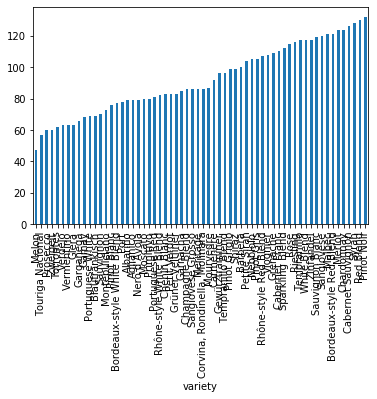

In [16]:
# what is the match with varieties from description model?

fm_varieties = pd.read_csv('varieties_to_keep.csv', names=['variety', 'keep'])
vac_ds[fm_varieties['variety']].sort_values().plot(kind='bar')

In [67]:
# okay, let's keep only the varieties coming from the other dataset, we have plenty of adjectives anyway

keep_varieties = list(fm_varieties['variety'].array)
dataset = dataset[dataset['variety'].isin(keep_varieties)]
dataset

,adj_accessible,adj_aggressive,adj_angular,adj_anise,adj_apple,adj_apricot,adj_asparagus,adj_astringent,adj_austere,adj_banana,...,adj_toasty,adj_unctuous,adj_vanilla,adj_vegetal,adj_velvety,adj_violet,adj_voluptuous,adj_zesty,adj_zippy,variety
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,White Blend
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Portuguese Red
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pinot Gris
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Riesling
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gewürztraminer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Riesling
120342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pinot Noir
120343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gewürztraminer
120344,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pinot Gris


In [68]:
X = dataset.filter(regex="adj_*")
y = dataset['variety']

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [70]:
X_train

,adj_accessible,adj_aggressive,adj_angular,adj_anise,adj_apple,adj_apricot,adj_asparagus,adj_astringent,adj_austere,adj_banana,...,adj_tight,adj_toasty,adj_unctuous,adj_vanilla,adj_vegetal,adj_velvety,adj_violet,adj_voluptuous,adj_zesty,adj_zippy
12243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23433,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
50556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

                    Aglianico       0.17      0.06      0.09        80
                     Albariño       0.23      0.10      0.14       125
                      Barbera       0.23      0.11      0.15       178
                Blaufränkisch       0.12      0.04      0.05        57
     Bordeaux-style Red Blend       0.24      0.36      0.29      1626
   Bordeaux-style White Blend       0.28      0.09      0.13       270
               Cabernet Franc       0.21      0.08      0.11       336
           Cabernet Sauvignon       0.23      0.33      0.27      2153
                    Carmenère       0.12      0.04      0.06       138
              Champagne Blend       0.20      0.09      0.12       333
                   Chardonnay       0.31      0.59      0.41      2714
                 Chenin Blanc       0.19      0.06      0.10       142
Corvina, Rondinella, Molinara       0.09      0.04      0.05       141
     